In [28]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Datasets

In [29]:
# Load CIC 2018 dataset
cic_data = None
cic_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/Hulk-Slowloris/*.csv')):
    print('Loading ', file, '...')
    df = pd.read_csv(file, dtype=str, skipinitialspace=True)  # Read in data from csv file

    attack = df.loc[df['Label'].str.contains('hulk|slowloris', case=False)].copy()  # Only get DoS related attacks
    benign = df.loc[df['Label'].str.contains('benign', case=False)].copy()  # Get all benign traffic

    data = pd.concat([attack, benign]).drop(['Label'], axis=1)  # Concatenate attack/benign and separate label from data
    labels = pd.concat([attack, benign])['Label']  # Save labels by themselves

    # Remove unused columns if present
    if 'Timestamp' in data:
        data = data.drop('Timestamp', axis=1)
    if 'Flow ID' in data:
        data = data.drop('Flow ID', axis=1)
    if 'Src IP' in data:
        data = data.drop('Src IP', axis=1)
    if 'Src Port' in data:
        data = data.drop('Src Port', axis=1)
    if 'Dst IP' in data:
        data = data.drop('Dst IP', axis=1)

    if cic_data is None:
        cic_data = data
        cic_labels = labels
    else:
        cic_data = pd.concat([cic_data, data])
        cic_labels = pd.concat([cic_labels, labels])

cic_data.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/Hulk-Slowloris/02-15-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/Hulk-Slowloris/02-16-2018.csv ...


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
28626,80,6,3863707,8,2,920,0,230,0,115,122.9401712797,0,0,0,0,238.1132937875,2.588187976,429300.777777778,680073.10420439,2016118,4,3863702,551957.428571429,733267.666337438,2016118,520,831937,831937,0,831937,831937,0,0,0,0,280,72,2.0705503808,0.5176375952,0,230,83.6363636364,116.0407451952,13465.4545454545,0,0,0,1,0,0,0,0,0,92,115,0,0,0,0,0,0,0,8,920,2,0,26883,219,4,32,0,0,0,0,0,0,0,0
28627,80,6,1023719,4,2,230,0,230,0,57.5,115,0,0,0,0,224.6710278895,5.8609833362,204743.8,457112.340888102,1022451,2,1023715,341238.333333333,589947.492779089,1022451,486,1266,1266,0,1266,1266,0,0,0,0,144,72,3.9073222242,1.9536611121,0,230,32.8571428571,86.9318287921,7557.1428571429,0,0,0,1,0,0,0,0,0,38.3333333333,57.5,0,0,0,0,0,0,0,4,230,2,0,26883,219,1,32,0,0,0,0,0,0,0,0
28628,80,6,830593,6,2,920,0,230,0,153.3333333333,118.7714892837,0,0,0,0,1107.6423711734,9.6316727928,118656.142857143,163396.275084459,416077,3,830588,166117.6,173759.700738693,416077,277,830590,830590,0,830590,830590,0,0,0,0,200,72,7.2237545946,2.4079181982,0,230,102.2222222222,121.2206436398,14694.4444444444,0,0,0,1,0,0,0,0,0,115,153.3333333333,0,0,0,0,0,0,0,6,920,2,0,26883,219,4,32,0,0,0,0,0,0,0,0
28629,80,6,578,3,2,230,0,230,0,76.6666666667,132.7905619136,0,0,0,0,397923.875432526,8650.5190311419,144.5,157.4685153716,306,3,562,281,35.3553390593,306,256,575,575,0,575,575,0,0,0,0,104,72,5190.3114186851,3460.2076124568,0,230,38.3333333333,93.8971068067,8816.6666666667,0,0,0,1,0,0,0,0,0,46,76.6666666667,0,0,0,0,0,0,0,3,230,2,0,26883,219,1,32,0,0,0,0,0,0,0,0
28630,80,6,1067,3,2,230,0,230,0,76.6666666667,132.7905619136,0,0,0,0,215557.638238051,4686.0356138707,266.75,387.6384698831,825,4,1063,531.5,415.0716805565,825,238,1063,1063,0,1063,1063,0,0,0,0,104,72,2811.6213683224,1874.4142455483,0,230,38.3333333333,93.8971068067,8816.6666666667,0,0,0,1,0,0,0,0,0,46,76.6666666667,0,0,0,0,0,0,0,3,230,2,0,26883,219,1,32,0,0,0,0,0,0,0,0


In [30]:
# Load USB 2021 dataset
usb_data = None
usb_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/*.csv')):
    print('Loading ', file, '...')
    df = pd.read_csv(file, dtype=str, skipinitialspace=True)  # Read in data from csv file

    attack = df.loc[df['Label'].str.contains('hulk|slowloris', case=False)].copy()  # Only get hulk/slowloris attacks
    benign = df.loc[df['Label'].str.contains('benign', case=False)].copy()  # Get all benign traffic

    data = pd.concat([attack, benign]).drop(['Label'], axis=1)  # Concatenate attack/benign and separate label from data
    labels = pd.concat([attack, benign])['Label']  # Save labels by themselves

    # Remove unused columns if present
    if 'Timestamp' in data:
        data = data.drop('Timestamp', axis=1)
    if 'Flow ID' in data:
        data = data.drop('Flow ID', axis=1)
    if 'Src IP' in data:
        data = data.drop('Src IP', axis=1)
    if 'Src Port' in data:
        data = data.drop('Src Port', axis=1)
    if 'Dst IP' in data:
        data = data.drop('Dst IP', axis=1)

    if usb_data is None:
        usb_data = data
        usb_labels = labels
    else:
        usb_data = pd.concat([usb_data, data])
        usb_labels = pd.concat([usb_labels, labels])

usb_data.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Security2.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/REGULAR.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Security2.csv ...


,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
3,80,6,102254714,10,9,255.0,0.0,168.0,0.0,25.499999999999996,50.42981922103892,0.0,0.0,0.0,0.0,2.49377256094032,0.1858105045406513,5680817.444444444,8676218.67624977,1.9025448E7,15.0,1.02254472E8,1.1361608E7,9346572.055658802,1.9025682E7,69.0,1.02254448E8,1.2781806E7,8893404.549605656,1.9025684E7,93.0,8,0,0,0,328,296,0.09779500238981646,0.08801550215083483,0.0,168.0,13.421052631578949,37.98291397965623,1442.7017543859647,0,2,0,8,18,0,0,0,0.9,13.421052631578947,25.5,0.0,0,0,0,0,0,0,0,13,0,0,29200,235,8,32,309.6666666666667,167.36028999337526,651.0,234.0,1.7042102333333332E7,4857899.74726036,1.9025448E7,7125956.0
4,80,6,102254251,10,9,252.0,0.0,168.0,0.0,25.2,50.50588524562702,0.0,0.0,0.0,0.0,2.464445219006103,0.18581134587744427,5680791.722222222,8676245.692171665,1.902547E7,10.0,1.02254036E8,1.1361559555555556E7,9346621.722903939,1.9025681E7,38.0,1.02254101E8,1.2781762625E7,8893453.968378603,1.9025682E7,71.0,8,0,0,0,328,296,0.09779544519865488,0.08801590067878938,0.0,168.0,13.263157894736844,37.98075844024059,1442.5380116959068,0,2,0,8,18,0,0,0,0.9,13.263157894736842,25.2,0.0,0,0,0,0,0,0,0,13,0,0,29200,235,8,32,242.33333333333331,66.08681159404398,377.0,211.0,1.7042097E7,4857977.967620891,1.902547E7,7125791.0
5,80,6,102253974,10,9,250.0,0.0,168.0,0.0,25.0,50.57228050578257,0.0,0.0,0.0,0.0,2.444892753019066,0.18581184922944902,5680776.333333333,8676246.662433961,1.9025481E7,10.0,1.02253775E8,1.1361530555555556E7,9346629.647068297,1.902568E7,106.0,1.0225387E8,1.278173375E7,8893452.901144315,1.9025677E7,139.0,8,0,0,0,328,296,0.09779571012076264,0.08801613910868637,0.0,168.0,13.1578947368421,37.99014953890422,1443.2514619883043,0,2,0,8,18,0,0,0,0.9,13.157894736842104,25.0,0.0,0,0,0,0,0,0,0,13,0,0,29200,235,8,32,253.16666666666666,129.31421680026781,517.0,196.0,1.7042042666666664E7,4858147.79889701,1.9025481E7,7125390.0
6,80,6,102253651,10,9,254.0,0.0,168.0,0.0,25.4,50.440724287689086,0.0,0.0,0.0,0.0,2.4840188835897896,0.1858124361740394,5680758.388888889,8676245.841095176,1.9025483E7,14.0,1.02253457E8,1.1361495222222222E7,9346636.037803277,1.9025678E7,74.0,1.02253444E8,1.27816805E7,8893495.6504053,1.9025674E7,87.0,8,0,0,0,328,296,0.0977960190389681,0.08801641713507129,0.0,168.0,13.368421052631579,37.972520073097,1441.9122807017545,0,2,0,8,18,0,0,0,0.9,13.368421052631579,25.4,0.0,0,0,0,0,0,0,0,13,0,0,29200,235,8,32,257.3333333333333,159.55270811448693,583.0,190.0,1.70419855E7,4858307.91381167,1.9025483E7,7125006.0
7,80,6,102253232,10,9,254.0,0.0,168.0,0.0,25.4,50.440724287689086,0.0,0.0,0.0,0.0,2.4840290622794203,0.18581319757208262,5680735.111111111,8676261.214882927,1.9025503E7,11.0,1.02253052E8,1.1361450222222222E7,9346681.154383194,1.9025677E7,39.0,1.0225309E8,1.278163625E7,8893550.059707

## Get Statistical Measures (Numerical Features)

In [38]:
# Display CIC statistical summary
cic_numerical = cic_data.iloc[:,2:].astype(dtype=float)
cic_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flow Duration,1915751.0,8.919172e+06,2.562166e+07,0.000000,1205.000000,53112.000000,4.270926e+06,1.200000e+08
Tot Fwd Pkts,1915751.0,4.422786e+00,2.503819e+01,1.000000,2.000000,2.000000,5.000000e+00,9.021000e+03
Tot Bwd Pkts,1915751.0,4.295221e+00,7.245510e+01,0.000000,0.000000,1.000000,3.000000e+00,1.918100e+04
TotLen Fwd Pkts,1915751.0,4.516005e+02,2.131912e+04,0.000000,0.000000,44.000000,9.350000e+02,8.737314e+06
TotLen Bwd Pkts,1915751.0,2.789069e+03,1.035761e+05,0.000000,0.000000,101.000000,3.550000e+02,2.790523e+07
Fwd Pkt Len Max,1915751.0,2.973339e+02,4.087429e+02,0.000000,0.000000,42.000000,6.770000e+02,6.444000e+04
Fwd Pkt Len Min,1915751.0,7.654165e+00,1.896673e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1915751.0,6.790094e+01,8.181535e+01,0.000000,0.000000,37.000000,1.435000e+02,1.652931e+04
Fwd Pkt Len Std,1915751.0,1.243083e+02,1.763966e+02,0.000000,0.000000,0.000000,2.281297e+02,1.840158e+04
Bwd Pkt Len Max,1915751.0,2.609649e+02,3.920788e+02,0.000000,0.000000,94.000000,3.500000e+02,8.688000e+03


In [39]:
# Display USB statistical summary
usb_numerical = usb_data.iloc[:,2:].astype(dtype=float)
usb_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flow Duration,3595147.0,1.907881e+06,7.864627e+06,0.000000,2.654530e+05,5.131450e+05,9.456025e+05,1.199999e+08
Total Fwd Packet,3595147.0,1.353128e+01,4.299259e+01,0.000000,6.000000e+00,8.000000e+00,8.000000e+00,2.108000e+03
Total Bwd packets,3595147.0,1.501467e+01,7.523993e+01,0.000000,5.000000e+00,6.000000e+00,6.000000e+00,3.793000e+03
Total Length of Fwd Packet,3595147.0,3.715421e+02,4.362607e+02,0.000000,3.340000e+02,3.620000e+02,3.810000e+02,1.980800e+05
Total Length of Bwd Packet,3595147.0,3.611328e+04,2.001612e+05,0.000000,1.119200e+04,1.119200e+04,1.119200e+04,9.847985e+06
Fwd Packet Length Max,3595147.0,3.356133e+02,8.559962e+01,0.000000,3.310000e+02,3.590000e+02,3.780000e+02,1.443000e+03
Fwd Packet Length Min,3595147.0,2.817228e-01,8.458059e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.560000e+02
Fwd Packet Length Mean,3595147.0,4.801965e+01,1.674162e+01,0.000000,4.262500e+01,4.850000e+01,5.650000e+01,6.560000e+02
Fwd Packet Length Std,3595147.0,1.256658e+02,3.544149e+01,0.000000,1.210000e+02,1.325825e+02,1.448972e+02,5.483888e+02
Bwd Packet Length Max,3595147.0,5.078993e+03,2.833332e+03,0.000000,4.344000e+03,5.792000e+03,5.792000e+03,1.119200e+04


In [40]:
# View percentages of CIC outliers
q1 = cic_numerical.quantile(0.25)
q3 = cic_numerical.quantile(0.75)
iqr = q3 - q1
((cic_numerical < (q1 - 1.5 * iqr)) | (cic_numerical > (q3 + 1.5 * iqr))).sum() / cic_numerical.shape[0]

Flow Duration        0.090192
Tot Fwd Pkts         0.060851
Tot Bwd Pkts         0.071976
TotLen Fwd Pkts      0.009770
TotLen Bwd Pkts      0.117623
Fwd Pkt Len Max      0.000009
Fwd Pkt Len Min      0.183712
Fwd Pkt Len Mean     0.000999
Fwd Pkt Len Std      0.000337
Bwd Pkt Len Max      0.107426
Bwd Pkt Len Min      0.178071
Bwd Pkt Len Mean     0.043917
Bwd Pkt Len Std      0.045771
Flow Byts/s          0.219496
Flow Pkts/s          0.184418
Flow IAT Mean        0.086189
Flow IAT Std         0.059888
Flow IAT Max         0.056817
Flow IAT Min         0.211407
Fwd IAT Tot          0.087386
Fwd IAT Mean         0.085756
Fwd IAT Std          0.037744
Fwd IAT Max          0.055945
Fwd IAT Min          0.205979
Bwd IAT Tot          0.188573
Bwd IAT Mean         0.177724
Bwd IAT Std          0.175347
Bwd IAT Max          0.184121
Bwd IAT Min          0.224016
Fwd PSH Flags        0.028071
Bwd PSH Flags        0.000000
Fwd URG Flags        0.000000
Bwd URG Flags        0.000000
Fwd Header

In [41]:
# View percentages of USB outliers
q1 = usb_numerical.quantile(0.25)
q3 = usb_numerical.quantile(0.75)
iqr = q3 - q1
((usb_numerical < (q1 - 1.5 * iqr)) | (usb_numerical > (q3 + 1.5 * iqr))).sum() / usb_numerical.shape[0]

Flow Duration                 0.080569
Total Fwd Packet              0.089461
Total Bwd packets             0.106128
Total Length of Fwd Packet    0.076759
Total Length of Bwd Packet    0.306742
Fwd Packet Length Max         0.089350
Fwd Packet Length Min         0.002246
Fwd Packet Length Mean        0.095900
Fwd Packet Length Std         0.093012
Bwd Packet Length Max         0.323967
Bwd Packet Length Min         0.000065
Bwd Packet Length Mean        0.278883
Bwd Packet Length Std         0.298493
Flow Bytes/s                  0.115629
Flow Packets/s                0.116287
Flow IAT Mean                 0.065657
Flow IAT Std                  0.069231
Flow IAT Max                  0.076811
Flow IAT Min                  0.003879
Fwd IAT Total                 0.080570
Fwd IAT Mean                  0.060397
Fwd IAT Std                   0.067771
Fwd IAT Max                   0.076831
Fwd IAT Min                   0.124286
Bwd IAT Total                 0.093327
Bwd IAT Mean             

## View Unique Protocols

In [35]:
# View CIC unique protocols
cic_data['Protocol'].unique()

array(['6', '0', '17'], dtype=object)

In [36]:
# View USB unique protocols
usb_data['Protocol'].unique()

array(['6', '0', '17'], dtype=object)

## View Destination Port Distribution

Text(0.5, 1.0, 'Destination Ports')

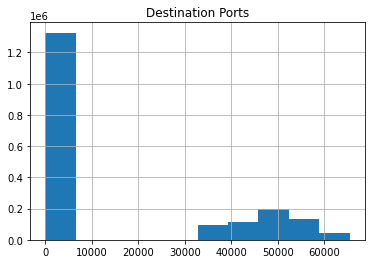

In [45]:
# View distribution of CIC destination ports
cic_data['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Destination Ports')

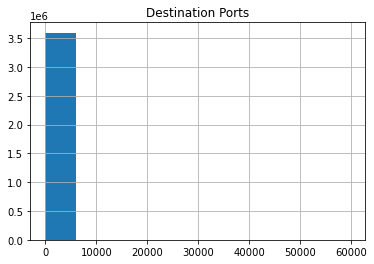

In [46]:
# View distribution of USB destination ports
usb_data['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

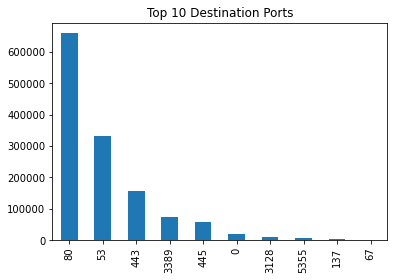

In [43]:
# View distribution of top 10 CIC destination ports
top_10 = cic_data['Dst Port'].value_counts()[:10]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

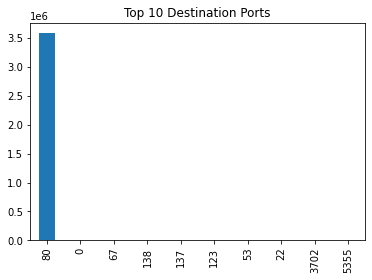

In [44]:
# View distribution of top 10 USB destination ports
top_10 = usb_data['Dst Port'].value_counts()[:10]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')